### 画像にラベルをつけて、データセットを作成する

In [1]:
#画像ファイルを読んでNumpy形式に変換
#画像にラベルをつけて保存
import numpy as np
from PIL import Image
import glob, os, random

#保存ファイル名
outfile="./images/dataset.npz"
#利用する画像枚数
max_photo=200
#画像サイズ
photo_size=64
#画像データ
x=[]
#ラベルデータ
y=[]

def main():
    #各画像フォルダを読む
    glob_files("./images/face0/", 0)
    glob_files("./images/face1/", 1)
    
    #ファイルへ保存
    np.savez(outfile, x=x, y=y)
    print("データセットの作成完了："+outfile, len(x))
    

#path以下の画像を読み込む
def glob_files(path, label):
    #画像ファイルを読む
    files=glob.glob(path+"/*.jpg")
    random.shuffle(files)
    
    #各ファイルを処理
    num=0
    for f in files:
        if num>=max_photo: break
        num+=1
        
        #画像ファイルを読む
        img=Image.open(f)
        #色空間をRGB
        img=img.convert("RGB")
        #サイズ変更
        img=img.resize((photo_size, photo_size))
        img=np.asarray(img)
        img=img/255
        x.append(img)
        y.append(label)
    
if __name__=='__main__':
    main()

データセットの作成完了：./images/dataset.npz 292


### データセットの確認

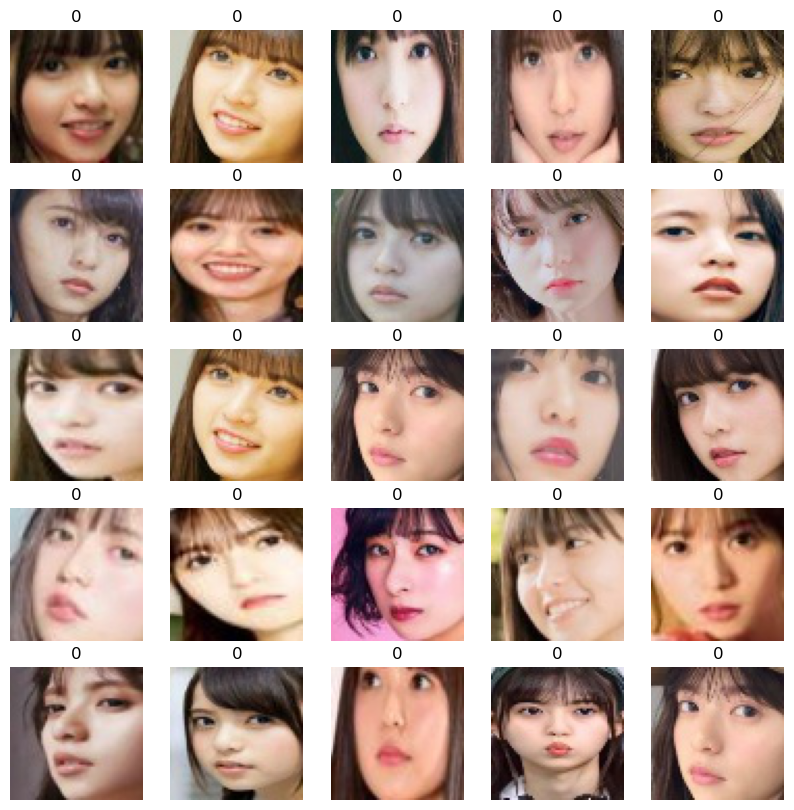

In [4]:
#画像とそのラベルの確認
import matplotlib.pyplot as plt

#画像データ読み込み
photos=np.load("./images/dataset.npz")
x=photos['x']
y=photos['y']

#開始インデックス
idx=0

#pyplotで出力
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title(y[i+idx])
    plt.axis('off')
    plt.imshow(x[i+idx])
plt.show()